# Heart Disease Prediction Model

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. 
Half the deaths in the United States and other developed countries are due to cardio vascular diseases. 
The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients 
and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease
as well as predict the overall risk using logistic regression. The daset can be downloaded from the link https://raw.githubusercontent.com/matackett/sta210/master/data/framingham.csv
and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Predict variable (desired target) in our data set is 
10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”).
As part of the Analysis on the missing values, we'll identify the no. of rows that have null values for atleast one column and drop them if they are not in significant number. Also, we'll perform EDA to see how the values are distributed for each column including the target variable. We'll divide the data set into training and test sets. Fit the model on the training data set and predict the values on the test data set using the model. We'll then evaluate the model by calculating the model accuracy and by showing the confusion matrix and the ROC curve. We'll implement several learnings from the course. 

In [4]:
# Read the data
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset=pd.read_csv('framingham.csv')
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [15]:
dataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [16]:
# Dropping all the rows that has the missing values
dataset.dropna(axis=0,inplace=True)

<ipython-input-17-01d6beca37f5>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dataset.hist(ax = ax)


array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>]], dtype=object)

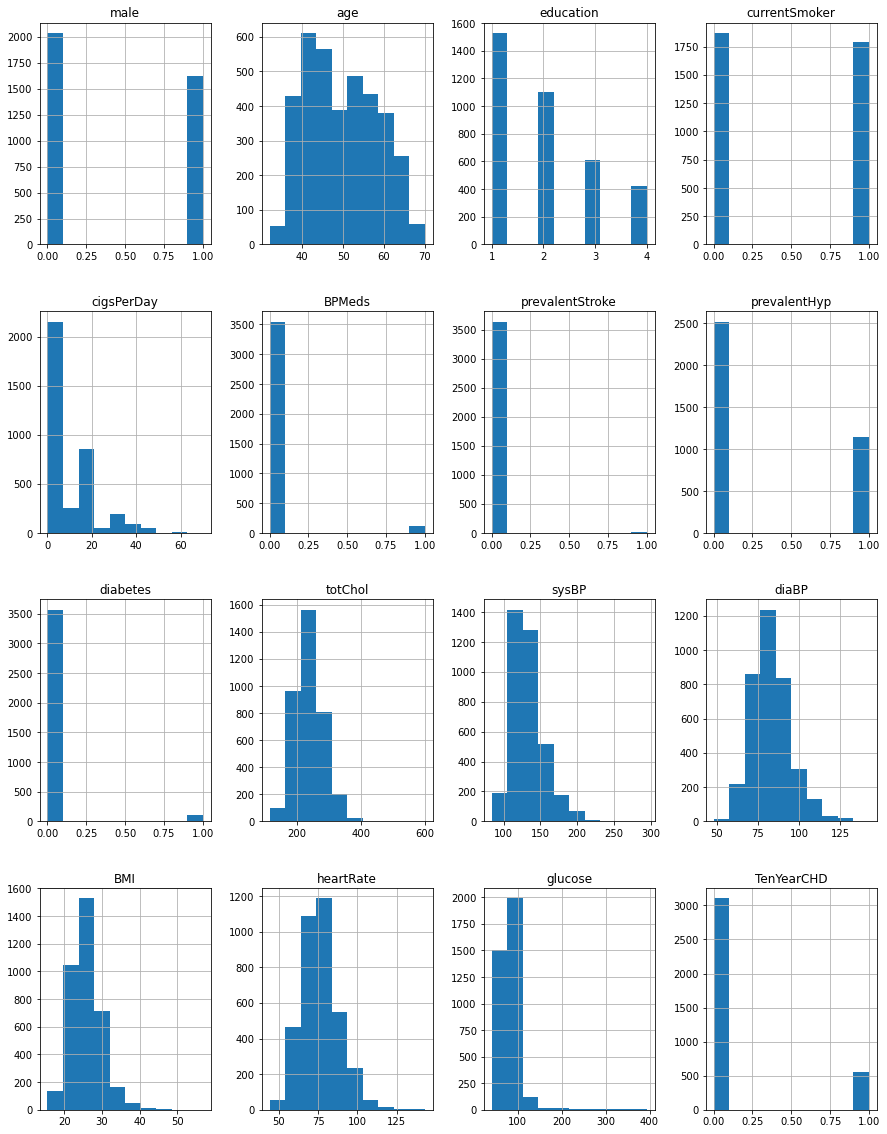

In [17]:
# checking distributions using histograms

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dataset.hist(ax = ax)

<AxesSubplot:>

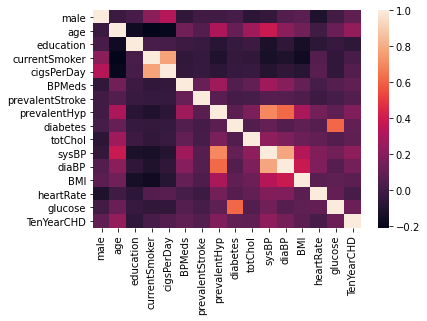

In [18]:
# check which features are correlated with each other and are correlated with the outcome variable
df_corr = dataset.corr()
sns.heatmap(df_corr)

The above plot is to show the correlation between all the features in the dataset. 

In [25]:
#Here we can see the correlations between features and hearth disease
dataset.corr()["TenYearCHD"].sort_values(ascending=False)

TenYearCHD         1.000000
age                0.233983
sysBP              0.222821
prevalentHyp       0.181387
diaBP              0.150124
glucose            0.121990
diabetes           0.093431
male               0.091688
totChol            0.091338
BPMeds             0.089152
BMI                0.082055
cigsPerDay         0.052014
prevalentStroke    0.048366
heartRate          0.020514
currentSmoker      0.019165
education         -0.063279
Name: TenYearCHD, dtype: float64

## According to these values above and in the figure below,people tend to have hearth disease if

they are older                
they have higher systolic blood pressure 
they are hypertensive 
they have higher diastolic blood pressure
they have higher glucose level glucose           
they have diabetes           
they are males   

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

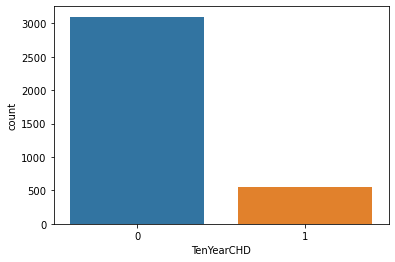

In [19]:
sns.countplot(x='TenYearCHD',data=dataset)

There are 3179 patents with no heart disease and 572 patients with risk of heart disease.

<AxesSubplot:title={'center':'Distribution of Heart Disease'}, ylabel='TenYearCHD'>

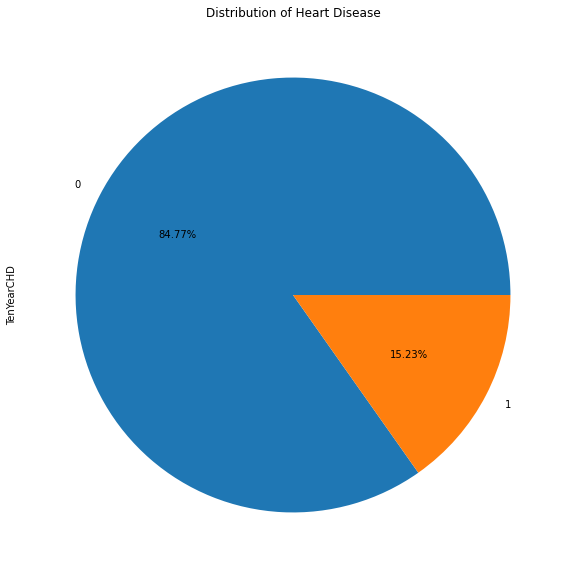

In [21]:
## Distribution of heart diseases in %
plt.figure(figsize=(10,10))
plt.title("Distribution of Heart Disease")
dataset["TenYearCHD"].value_counts().plot(kind="pie",autopct='%1.2f%%')

The above plot shows that a total of 84.77% are healthy and the remaining are suffering from heart disease.

<AxesSubplot:title={'center':'Male Distribution'}, ylabel='male'>

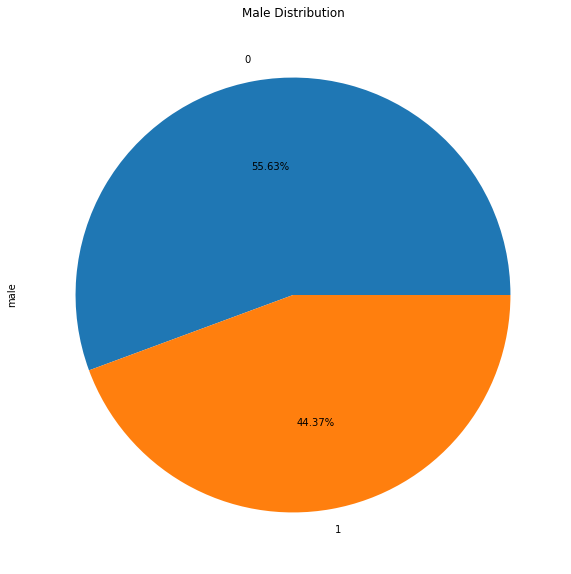

In [23]:
## Male population distribution
plt.figure(figsize=(10,10))
plt.title("Male Distribution")
dataset["male"].value_counts().plot(kind="pie",autopct='%1.2f%%')

The difference between no. of males and females in the dataset is not much.

<AxesSubplot:title={'center':'Smoker Distribution'}, ylabel='currentSmoker'>

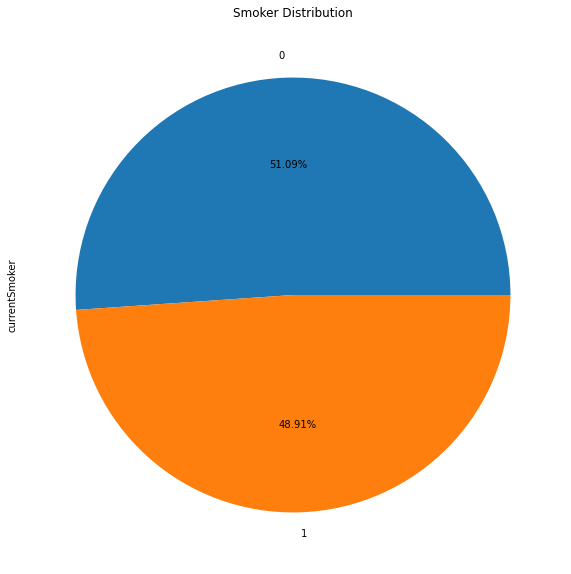

In [27]:
## Currently Smokers distribution
plt.figure(figsize=(10,10))
plt.title("Smoker Distribution")
dataset["currentSmoker"].value_counts().plot(kind="pie",autopct='%1.2f%%')

The pie chart indicates that 51.09% of the population currently are smokers and 48.91% are non smokers. 
There is no significant difference between currently smokers and non smokers.

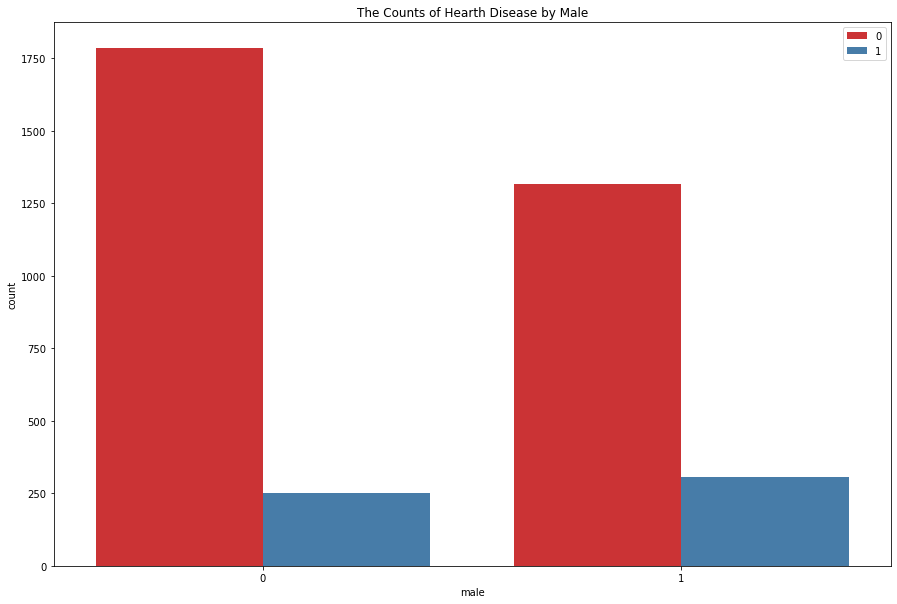

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(x="male",hue="TenYearCHD", data=dataset, palette="Set1")
plt.title("The Counts of Hearth Disease by Male")
plt.legend()

# Overview

Overall the quality of the data looks good. There are few rows that have null values for the columns. These rows are removed to avoid any noise in the data. Also, Based on the above plotted graphs, we can say that there a few fields that have correlation with the Heart disease such as age,sysBP,prevalentHyp,diaBP,glucose, male. 